NCA：CY45-05_1

<Figure size 6000x4000 with 0 Axes>

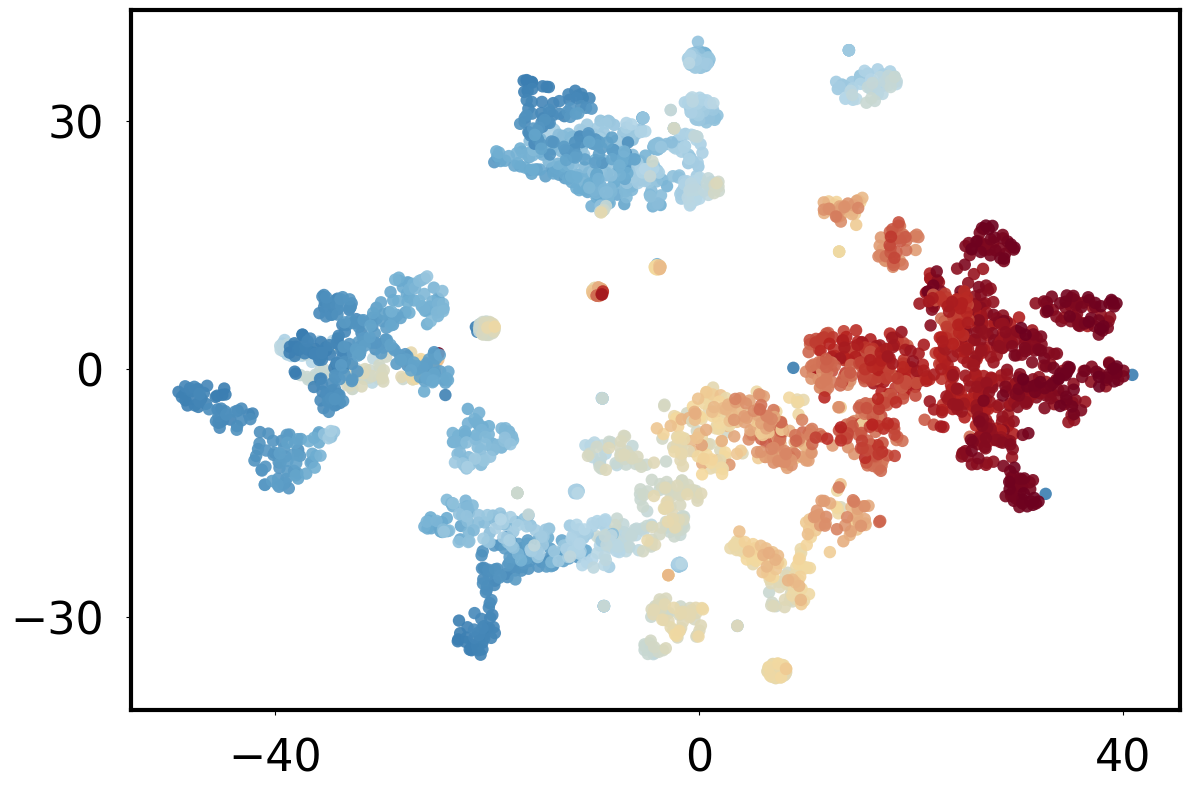

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import LinearSegmentedColormap

file_path = 'checkpoint/IMOE/UL-NCA/CY45-05_1/IMOE_dsNCA_ex5_pl50_tk2_ep2000_dm0/weights.csv'
df = pd.read_csv(file_path, header=0)

battery_ranges = [
    (0, 671),   
    (671, 1329),  
    (1329, 1927), 
    (1927, 2453),
    (2453, len(df))  
]

colors = ["#3A7DB1", "#6dadd1", "#b6d7e8", "#F4D99E", "#b7221f", "#6d011f"]
colors = ["#3A7DB1", "#6dadd1", "#b6d7e8", "#F4D99E", "#b7221f", "#6d011f"]
cmap = LinearSegmentedColormap.from_list("battery_cmap", colors)
plt.figure(figsize=(12, 8), dpi=500)
fig2, ax2 = plt.subplots(figsize=(12, 8))

all_tsne = []
all_cycles = []

for start, end in battery_ranges:
    battery_data = df.iloc[start:end].copy()

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(battery_data.iloc[:, :5])

    tsne = TSNE(n_components=2, random_state=42)
    X_tsne = tsne.fit_transform(X_scaled)
    all_tsne.append(X_tsne)

    cycle_nums = np.linspace(0, 1, len(battery_data))
    all_cycles.extend(cycle_nums)

X_combined = np.concatenate(all_tsne, axis=0)
scatter = ax2.scatter(X_combined[:, 0], X_combined[:, 1], 
                     c=all_cycles,
                     cmap=cmap,
                     s=80,
                     alpha=0.9,
                     linewidth=0)

from matplotlib.ticker import MaxNLocator
ax2.xaxis.set_major_locator(MaxNLocator(3)) 
ax2.yaxis.set_major_locator(MaxNLocator(3))  

plt.rcParams['font.family'] = 'Arial'  
ax2.tick_params(axis='both', labelsize=32,pad=16)  
for spine in ax2.spines.values():
    spine.set_visible(True)  
    spine.set_linewidth(3)  
    spine.set_color('black') 
plt.tight_layout()
plt.show()